### UNBALANCED DATASET 
- https://www.quora.com/In-classification-how-do-you-handle-an-unbalanced-training-set  
- http://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/  
- https://github.com/scikit-learn-contrib/imbalanced-learn  
- https://shiring.github.io/machine_learning/2017/04/02/unbalanced  

#### TRY samesize DATA
N=2000 each : a bit above chance model v0/v1 (acc~55-61%) || Not great ...  ref -- model_v1#.h5  
Ref: http://localhost:8888/notebooks/load_Imgs_runtestCNN_v0.ipynb



#### General REQs

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd

In [2]:
# !pwd
# path='/Users/hrm/Documents/Dropbox/DSrelated/DG_datachallenge'
path = '/home/ubuntu/pynb/DG_datachallenge'

#### File paths

In [3]:
import glob, os, sys
buildingFileNames = glob.glob(os.path.join(path+'/building_set/buildings/','*.tif')) #os.listdir( path+'/building_set/buildings/' )
# buildingFileNames
nobuildingFileNames = glob.glob(os.path.join(path+'/building_set/no_buildings/','*.tif')) #os.listdir( path+'/building_set/no_buildings' )
# nobuildingFileNames

In [18]:
# np.random.choice(5, 3, replace=False)
# [buildingFileNames[i] for i in np.random.choice(len(buildingFileNames),4000,replace=True).tolist()]

['/home/ubuntu/pynb/DG_datachallenge/building_set/buildings/162585.tif',
 '/home/ubuntu/pynb/DG_datachallenge/building_set/buildings/114699.tif',
 '/home/ubuntu/pynb/DG_datachallenge/building_set/buildings/810968.tif',
 '/home/ubuntu/pynb/DG_datachallenge/building_set/buildings/169469.tif',
 '/home/ubuntu/pynb/DG_datachallenge/building_set/buildings/149799.tif',
 '/home/ubuntu/pynb/DG_datachallenge/building_set/buildings/289423.tif',
 '/home/ubuntu/pynb/DG_datachallenge/building_set/buildings/356011.tif',
 '/home/ubuntu/pynb/DG_datachallenge/building_set/buildings/731303.tif',
 '/home/ubuntu/pynb/DG_datachallenge/building_set/buildings/677763.tif',
 '/home/ubuntu/pynb/DG_datachallenge/building_set/buildings/841552.tif',
 '/home/ubuntu/pynb/DG_datachallenge/building_set/buildings/476416.tif',
 '/home/ubuntu/pynb/DG_datachallenge/building_set/buildings/457521.tif',
 '/home/ubuntu/pynb/DG_datachallenge/building_set/buildings/681105.tif',
 '/home/ubuntu/pynb/DG_datachallenge/building_set/b

In [19]:
# [nobuildingFileNames[i] for i in np.random.randint(0,len(nobuildingFileNames),2000).tolist()]
# [nobuildingFileNames[i] for i in np.random.choice(len(nobuildingFileNames),4000,replace=False).tolist()]

['/home/ubuntu/pynb/DG_datachallenge/building_set/no_buildings/554854.tif',
 '/home/ubuntu/pynb/DG_datachallenge/building_set/no_buildings/56191.tif',
 '/home/ubuntu/pynb/DG_datachallenge/building_set/no_buildings/197080.tif',
 '/home/ubuntu/pynb/DG_datachallenge/building_set/no_buildings/189341.tif',
 '/home/ubuntu/pynb/DG_datachallenge/building_set/no_buildings/743355.tif',
 '/home/ubuntu/pynb/DG_datachallenge/building_set/no_buildings/135165.tif',
 '/home/ubuntu/pynb/DG_datachallenge/building_set/no_buildings/620345.tif',
 '/home/ubuntu/pynb/DG_datachallenge/building_set/no_buildings/550020.tif',
 '/home/ubuntu/pynb/DG_datachallenge/building_set/no_buildings/406607.tif',
 '/home/ubuntu/pynb/DG_datachallenge/building_set/no_buildings/251706.tif',
 '/home/ubuntu/pynb/DG_datachallenge/building_set/no_buildings/629203.tif',
 '/home/ubuntu/pynb/DG_datachallenge/building_set/no_buildings/8332.tif',
 '/home/ubuntu/pynb/DG_datachallenge/building_set/no_buildings/125535.tif',
 '/home/ubuntu/

#### Define traintest data

In [4]:
# import pandas as pd

Train_Bfiles  = buildingFileNames[:1000]
Test_Bfiles = buildingFileNames[1000:2000] #total files

## No-Buildings --- there're actually 20,000 nb_cases!!! --> stratified/random sampling?
Train_NBfiles  = nobuildingFileNames[:1000]
Test_NBfiles = nobuildingFileNames[1000:2000]



buildDF = pd.DataFrame(Train_Bfiles, columns=['filename'])
buildDF['Blabel'] = 1
nobuildDF = pd.DataFrame(Train_NBfiles, columns=['filename'])
nobuildDF['Blabel'] = 0

FileIdx_Train = pd.concat([buildDF,nobuildDF])



buildDF = pd.DataFrame(Test_Bfiles, columns=['filename'])
buildDF['Blabel'] = 1

nobuildDF = pd.DataFrame(Test_NBfiles, columns=['filename'])
nobuildDF['Blabel'] = 0

FileIdx_Test = pd.concat([buildDF,nobuildDF])


In [ ]:
### SUBSEQUENTLY -- to try all images
# from sklearn.model_selection import train_test_split

# X_train, X_valid, y_train, y_valid = train_test_split(X_all, y_all, 
#                                                     test_size=0.2, random_state=23, 
#                                                     stratify=y_all)

In [23]:
# FileIdx_Test==FileIdx_Train

In [5]:
# FileIdx_Train.sample(2000).Blabel.value_counts()
FileIdx_Test.sample(2000).Blabel.value_counts()

1    1000
0    1000
Name: Blabel, dtype: int64

#### Define basic image preprocessing 

In [6]:
import numpy as np
from skimage import color, exposure, transform

# NUM_CLASSES = 2
IMG_SIZE = 256

def preprocess_img(img):
    img=np.array(img)
    # Histogram normalization in v channel
    hsv = color.rgb2hsv(img)
    hsv[:,:,2] = exposure.equalize_hist(hsv[:,:,2])
    img = color.hsv2rgb(hsv)

    # central square crop
    min_side = min(img.shape[:-1])
    centre = img.shape[0]//2, img.shape[1]//2
    img = img[centre[0]-min_side//2:centre[0]+min_side//2,
              centre[1]-min_side//2:centre[1]+min_side//2,
              :]

    # rescale to standard size
    img = transform.resize(img, (IMG_SIZE, IMG_SIZE), mode='constant')

    # roll color axis to axis 0
    #img = np.rollaxis(img,-1)

    return img

#### Define function to load & run image processing --> image np_arrays

In [29]:
from skimage import io
import os
import glob

def get_Fileclass(img_path):
    return str(img_path.split('/')[-2])

def get_FileName(img_path):
    return str(img_path.split('/')[-1])



def makeImageXYvars(FileIdx_file):

    imgs = []
    labels = []
    
    cnt = 0
    N = 0 
    imgN = 500
    

    # TrainImgPaths = FileIdx_Train.ix[FileIdx_Train.sample(2000).Blabel.index.tolist()]
    FileImgPaths = FileIdx_file.ix[FileIdx_file.sample(2000).Blabel.index.tolist()] #randomly samples each time...

    # for img_path in TrainImgPaths.filename:
    for img_path in FileImgPaths.filename:    

        img = preprocess_img(io.imread(img_path))  ## add image more pre-processing later...

        label = get_Fileclass(img_path)
        #print('preprocessing image : '+ label + ' -- ' + get_FileName(img_path))

        imgs.append(img)
        labels.append(label)

        if cnt%imgN==0:
            N += 1
            print('preprocessed {0} images ...'.format(N*imgN))
        
        cnt += 1


    X = np.array(imgs, dtype='float32')

    # Make one hot targets
    Y= FileImgPaths.Blabel.values 

    return X, Y, FileImgPaths


#### Run image processing --> np_arrays

In [30]:
# X,Y, FileImgPaths = makeImageXYvars(FileIdx_Train)
X,Y, FileImgPaths = makeImageXYvars(FileIdx_Test)

preprocessing image : buildings -- 293685.tif
preprocessing image : no_buildings -- 585824.tif
preprocessing image : buildings -- 219186.tif
preprocessing image : no_buildings -- 555634.tif
preprocessing image : buildings -- 80938.tif
preprocessing image : no_buildings -- 291194.tif
preprocessing image : buildings -- 259060.tif
preprocessing image : no_buildings -- 226232.tif
preprocessing image : buildings -- 250071.tif
preprocessing image : no_buildings -- 605513.tif
preprocessing image : buildings -- 446925.tif
preprocessing image : no_buildings -- 703213.tif
preprocessing image : buildings -- 156697.tif
preprocessing image : no_buildings -- 349454.tif
preprocessing image : buildings -- 2365.tif
preprocessing image : no_buildings -- 435907.tif
preprocessing image : buildings -- 163642.tif
preprocessing image : no_buildings -- 205243.tif
preprocessing image : buildings -- 44433.tif
preprocessing image : no_buildings -- 727656.tif
preprocessing image : buildings -- 428599.tif
preproce

In [ ]:
# Y.shape, Y
# ((4000,), array([1, 0, 1, ..., 0, 1, 0]))

In [38]:
### RESHAPE Y
from keras.utils import np_utils
Y=np_utils.to_categorical(Y, 2)

#### SAVE FILES

In [41]:
### SAVE FILES

import pickle
import numpy as np

# np.save(path+'/building_set/TrainX_v0',X)
# np.save(path+'/building_set/TrainY_v0',Y)


# np.save(path+'/building_set/TestX_v0',X)
# np.save(path+'/building_set/TestY_v0',Y)



#### LOAD FILES

In [48]:
# LOAD saved vars


Xtrain=np.load(path+'/building_set/TrainX_v0'+'.npy')
Ytrain=np.load(path+'/building_set/TrainY_v0'+'.npy')
print(Xtrain.shape, Ytrain.shape)


Xtest=np.load(path+'/building_set/TestX_v0'+'.npy')
Ytest=np.load(path+'/building_set/TestY_v0'+'.npy')
print(Xtest.shape, Ytest.shape)


(4000, 256, 256, 3) (4000, 2)
(4000, 256, 256, 3) (4000, 2)


In [95]:
import keras
keras.backend.image_data_format()

'channels_last'

#### CHECK images

In [24]:
from keras.preprocessing.image import load_img #, img_to_array

Using TensorFlow backend.


(250, 255, 3)

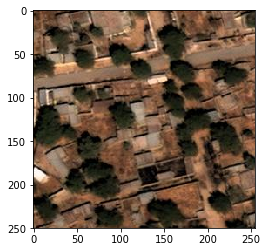

In [59]:
img = load_img(path+'/building_set/train/buildings/100208.tif')  # this is a PIL image of geotif file
plt.imshow(img)
np.shape(img)

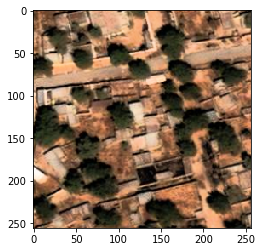

In [60]:
# img2 = preprocess_img(np.array(img)) #without rollaxis to see what img_preprocessing does...
img2 = preprocess_img(img) 

plt.imshow(img2)
plt.show()

In [118]:
print(FileIdx_Test.values[:10])

[['/home/ubuntu/pynb/DG_datachallenge/building_set/buildings/298021.tif' 1]
 ['/home/ubuntu/pynb/DG_datachallenge/building_set/buildings/418039.tif' 1]
 ['/home/ubuntu/pynb/DG_datachallenge/building_set/buildings/768288.tif' 1]
 ['/home/ubuntu/pynb/DG_datachallenge/building_set/buildings/1014.tif' 1]
 ['/home/ubuntu/pynb/DG_datachallenge/building_set/buildings/133578.tif' 1]
 ['/home/ubuntu/pynb/DG_datachallenge/building_set/buildings/583792.tif' 1]
 ['/home/ubuntu/pynb/DG_datachallenge/building_set/buildings/229441.tif' 1]
 ['/home/ubuntu/pynb/DG_datachallenge/building_set/buildings/288278.tif' 1]
 ['/home/ubuntu/pynb/DG_datachallenge/building_set/buildings/671809.tif' 1]
 ['/home/ubuntu/pynb/DG_datachallenge/building_set/buildings/690956.tif' 1]]


In [71]:
print(FileIdx_Train.values[:10])

[['/home/ubuntu/pynb/DG_datachallenge/building_set/buildings/289840.tif' 1]
 ['/home/ubuntu/pynb/DG_datachallenge/building_set/buildings/188789.tif' 1]
 ['/home/ubuntu/pynb/DG_datachallenge/building_set/buildings/641926.tif' 1]
 ['/home/ubuntu/pynb/DG_datachallenge/building_set/buildings/291971.tif' 1]
 ['/home/ubuntu/pynb/DG_datachallenge/building_set/buildings/391089.tif' 1]
 ['/home/ubuntu/pynb/DG_datachallenge/building_set/buildings/393329.tif' 1]
 ['/home/ubuntu/pynb/DG_datachallenge/building_set/buildings/708734.tif' 1]
 ['/home/ubuntu/pynb/DG_datachallenge/building_set/buildings/263458.tif' 1]
 ['/home/ubuntu/pynb/DG_datachallenge/building_set/buildings/70855.tif' 1]
 ['/home/ubuntu/pynb/DG_datachallenge/building_set/buildings/363206.tif' 1]]


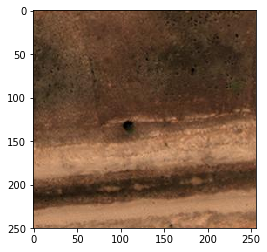

In [36]:
img = load_img(path+'/building_set/no_buildings/585824.tif')  # this is a PIL image of geotif file
plt.imshow(img)

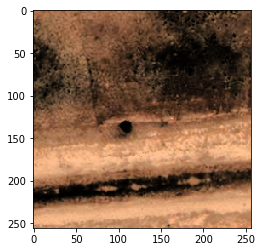

In [57]:
plt.imshow(Xtest[1])

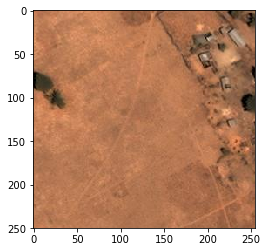

In [117]:
img = load_img(path+'/building_set/buildings/120509.tif')  # this is a PIL image of geotif file
plt.imshow(img)

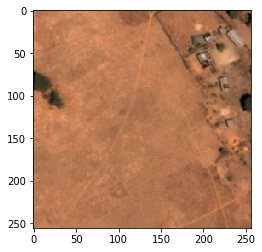

In [115]:
# Xtrain.shape
plt.imshow(Xtrain[66])